In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


d:\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:

# 设置字体为SimHei（黑体），需确保系统中已安装此字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

imdb_df = pd.read_csv("imdb_top250.csv")
douban_df = pd.read_csv("douban_top250.csv")


IMDb数据预览:
    title  rating     vote            quote
0  肖申克的救赎     9.7  3097118          希望让人自由。
1    霸王别姬     9.6  2285542            风华绝代。
2    阿甘正传     9.5  2305011        一部美国近现代史。
3   泰坦尼克号     9.5  2346167       失去的才是永恒的。 
4    千与千寻     9.4  2394242  最好的宫崎骏，最好的久石让。 
Douban数据预览:
    title  rating     vote            quote
0  肖申克的救赎     9.7  3097118          希望让人自由。
1    霸王别姬     9.6  2285542            风华绝代。
2    阿甘正传     9.5  2305011        一部美国近现代史。
3   泰坦尼克号     9.5  2346167       失去的才是永恒的。 
4    千与千寻     9.4  2394242  最好的宫崎骏，最好的久石让。 


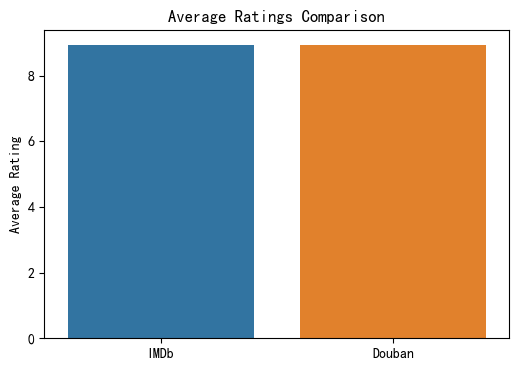

In [ ]:


# 简单查看数据
print("IMDb数据预览:")
print(imdb_df.head())
print("Douban数据预览:")
print(douban_df.head())

# 1. 比较平均评分
mean_imdb_rating = imdb_df['rating'].mean()
mean_douban_rating = douban_df['rating'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=['IMDb','Douban'], y=[mean_imdb_rating, mean_douban_rating])
plt.title('Average Ratings Comparison')
plt.ylabel('Average Rating')
plt.show()


Number of movies in both lists: 250


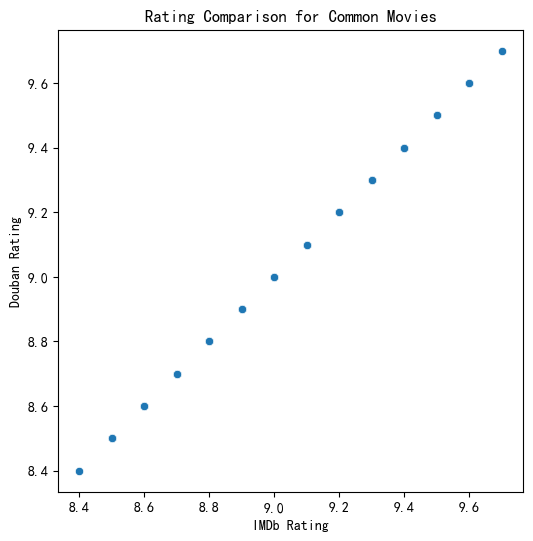

In [ ]:

# 2. 找到同时出现在两个榜单中的电影

common_movies = pd.merge(imdb_df, douban_df, on='title', suffixes=('_imdb','_douban'))
print("Number of movies in both lists:", len(common_movies))

# 可视化两个平台对这些共同电影的评分差异（散点图）
plt.figure(figsize=(6,6))
sns.scatterplot(data=common_movies, x='rating_imdb', y='rating_douban')
plt.title('Rating Comparison for Common Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('Douban Rating')
plt.show()


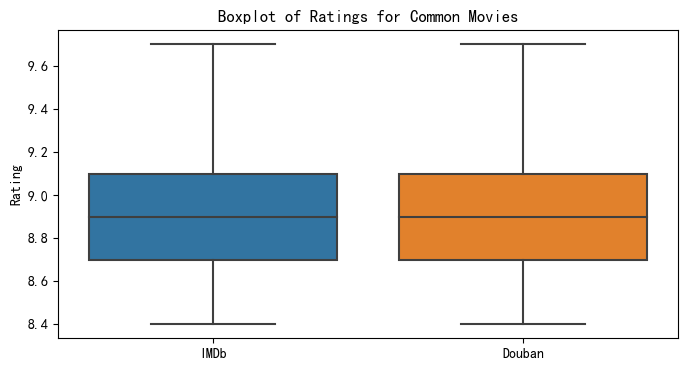

In [ ]:

# 分析共同电影的评分分布
# 我们可以对共同出现的电影的评分做一个对比箱线图或小提琴图
plt.figure(figsize=(8,4))
sns.boxplot(data=common_movies[['rating_imdb','rating_douban']])
plt.title('Boxplot of Ratings for Common Movies')
plt.xticks([0,1], ['IMDb','Douban'])
plt.ylabel('Rating')
plt.show()


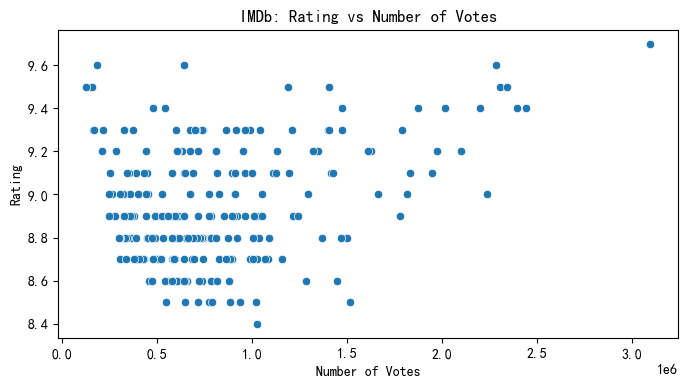

In [ ]:

# 3. 分析评价人数与评分之间的关系（对IMDb、Douban分别来一张散点图）
plt.figure(figsize=(8,4))
sns.scatterplot(data=imdb_df, x='vote', y='rating')
plt.title('IMDb: Rating vs Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()


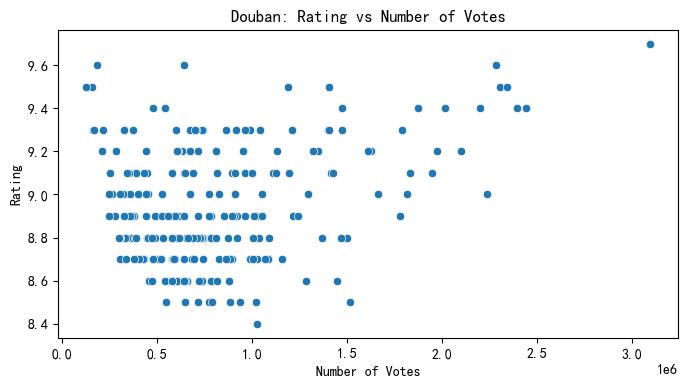

In [ ]:

plt.figure(figsize=(8,4))
sns.scatterplot(data=douban_df, x='vote', y='rating')
plt.title('Douban: Rating vs Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()


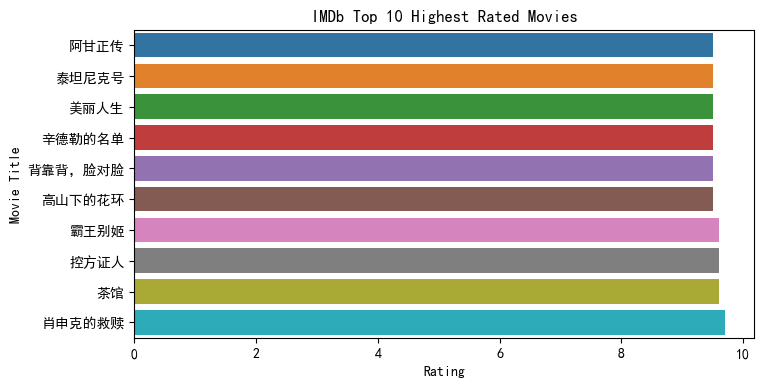

In [ ]:

# 如果需要查看最高评分电影
top10_imdb = imdb_df.nlargest(10, 'rating').sort_values('rating', ascending=True)
plt.figure(figsize=(8,4))
sns.barplot(x='rating', y='title', data=top10_imdb, orient='h')
plt.title("IMDb Top 10 Highest Rated Movies")
plt.xlabel("Rating")
plt.ylabel("Movie Title")
plt.show()


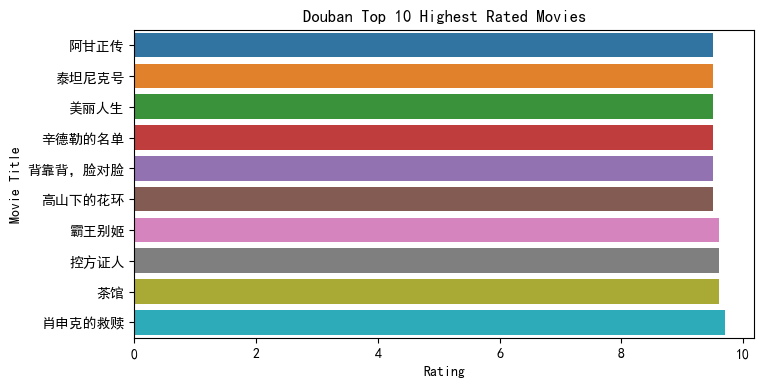

In [ ]:

top10_douban = douban_df.nlargest(10, 'rating').sort_values('rating', ascending=True)
plt.figure(figsize=(8,4))
sns.barplot(x='rating', y='title', data=top10_douban, orient='h')
plt.title("Douban Top 10 Highest Rated Movies")
plt.xlabel("Rating")
plt.ylabel("Movie Title")
plt.show()

